In [2]:
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import layers
from keras import models
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),
                        activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
original_dataset_dir = 'C:/Users/Welcome/Dogs Emotion Recognition/Dogs_Emotion_Recognition_Dataset'
base_dir = 'C:/Users/Welcome/Dogs Emotion Recognition/Dogs_Emotion_Recognition_Dataset'
# os.mkdir(base_dir)

In [10]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
data batch shape:  (32, 224, 224, 3)
labels batch shape:  (32, 4)


In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)
model.save('doggos_1.h5')

Epoch 1/30
100/100 [==============================] - 295s 3s/step - loss: 1.6169 - acc: 0.2750 - val_loss: 1.4691 - val_acc: 0.2500


In [13]:
history = model.fit(validation_generator, validation_data=validation_generator, batch_size=32, epochs=30)
# model.fit(
    #validation_generator, train_generator,
    #epochs=30,
    #validation_data=(validation_generator, validation_generator)
#)

Epoch 1/30
13/13 [==============================] - 110s 9s/step - loss: 1.4140 - acc: 0.2375 - val_loss: 1.3505 - val_acc: 0.4350
Epoch 2/30
13/13 [==============================] - 97s 7s/step - loss: 1.3511 - acc: 0.3350 - val_loss: 1.2922 - val_acc: 0.2975
Epoch 3/30
13/13 [==============================] - 98s 8s/step - loss: 1.2785 - acc: 0.4675 - val_loss: 1.1462 - val_acc: 0.7450
Epoch 4/30
13/13 [==============================] - 100s 8s/step - loss: 1.1432 - acc: 0.5325 - val_loss: 1.0358 - val_acc: 0.6475
Epoch 5/30
13/13 [==============================] - 132s 9s/step - loss: 1.0516 - acc: 0.6275 - val_loss: 0.9382 - val_acc: 0.6675
Epoch 6/30
13/13 [==============================] - 92s 7s/step - loss: 0.8996 - acc: 0.7450 - val_loss: 0.8709 - val_acc: 0.6675
Epoch 7/30
13/13 [==============================] - 97s 8s/step - loss: 0.8549 - acc: 0.7075 - val_loss: 0.6648 - val_acc: 0.8875
Epoch 8/30
13/13 [==============================] - 94s 7s/step - loss: 0.7287 - acc: 0

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [16]:
epochs = range(1, len(acc) + 1)

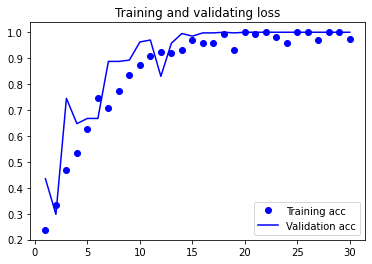

In [18]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validating loss')
plt.legend()
plt.show()